# YOLO Training Configuration Parameters

This document explains the additional parameters used in the YOLO training process. These parameters allow for customization and optimization of the training pipeline.

## Parameters Explanation

### `batch=16`
- **Description**: Sets the batch size for training.
- **Impact**: Higher values may improve training speed but require more GPU memory.

### `device=0`
- **Description**: Specifies the GPU ID to use for training.
- **Options**: 
  - Use `0`, `1`, etc., for specific GPU IDs.
  - Use `'cpu'` if no GPU is available.

### `lr0=0.01`
- **Description**: Sets the initial learning rate for the optimizer.
- **Impact**: Affects how quickly the model weights are updated during training.

### `optimizer='Adam'`
- **Description**: Chooses the optimizer for training.
- **Options**:
  - `'Adam'` for Adam optimizer.
  - `'SGD'` for Stochastic Gradient Descent.

### `workers=8`
- **Description**: Specifies the number of worker threads for data loading.
- **Impact**: Higher values can improve data loading speeds but may require more system resources.

### `seed=42`
- **Description**: Ensures reproducibility by setting a random seed.
- **Impact**: Makes training results consistent across different runs.

### `patience=10`
- **Description**: Implements early stopping if validation metrics do not improve for the specified number of epochs.
- **Impact**: Prevents overfitting and saves training time.

### `weight_decay=0.0005`
- **Description**: Applies weight decay for regularization.
- **Impact**: Reduces overfitting by penalizing large weights.

### `momentum=0.937`
- **Description**: Momentum parameter for optimizers like SGD.
- **Impact**: Helps accelerate gradients vectors in the right direction, leading to faster convergence.

### `name='exp_name'`
- **Description**: Names the experiment and creates a folder in the `runs/train` directory.
- **Impact**: Helps organize and identify training experiments.

### `verbose=True`
- **Description**: Outputs detailed logs during training.
- **Impact**: Provides more visibility into the training process.

---

## Example Usage

```python
results = model.train(
    data="data.yaml",   # Path to dataset YAML file
    epochs=100,         # Number of training epochs
    imgsz=640,          # Image size (resolution)
    batch=16,           # Batch size
    device=0,           # GPU ID or 'cpu'
    lr0=0.01,           # Initial learning rate
    optimizer="Adam",   # Optimizer type
    workers=8,          # Number of dataloader workers
    seed=42,            # Random seed for reproducibility
    patience=10,        # Early stopping patience
    weight_decay=0.0005,  # Weight decay
    momentum=0.937,     # Momentum for SGD
    name="exp_name",    # Experiment name
    verbose=True        # Detailed logs
)


https://universe.roboflow.com/workenv-dayet/facial-emotion-dataset-7g1jd-hipbk

**Step 01 # Install the Ultralytics Package**

In [1]:

import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install ultralytics
!pip install roboflow

# Clean up the notebook
clean_notebook()




Notebook cleaned.


**Step 02 # Import All the Requried Libraries**

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-80GB MIG 7g.80gb, 81051MiB)
Setup complete ✅ (256 CPUs, 2015.7 GB RAM, 265.9/3519.1 GB disk)


**Step # 03 Download Dataset from Roboflow**

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("workenv-dayet").project("facial-emotion-dataset-7g1jd-hipbk")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [4]:
dataset.location

'/workspace/code/test/yolo11/Facial-Emotion-Dataset--3'

In [5]:

from ultralytics import YOLO
from IPython.display import Image

# Load the YOLO model
model = YOLO("yolo11n.pt")  # Load your model architecture or pre-trained weights

# Train the model with the specified configuration
results = model.train(
    data=f"{dataset.location}/data.yaml",  # Path to dataset YAML file
    epochs=30,         # Number of training epochs
    imgsz=640,          # Image size (resolution)
    batch=32,           # Batch size
    device=0,           # Specify GPU (0) or CPU ('cpu')
    lr0=0.01,           # Initial learning rate
    optimizer="Adam",   # Optimizer (e.g., 'SGD', 'Adam')
    workers=8,          # Number of dataloader workers
    seed=42,            # Random seed for reproducibility
    patience=10,        # Early stopping patience (number of epochs)
    weight_decay=0.0005,  # Weight decay for regularization
    momentum=0.937,     # Momentum for SGD
    name="exp_name",    # Name of the experiment folder
    verbose=True        # Print detailed training logs
)

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-80GB MIG 7g.80gb, 81051MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/workspace/code/test/yolo11/Facial-Emotion-Dataset--3/data.yaml, epochs=30, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=exp_name, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

train: Scanning /workspace/code/test/yolo11/Facial-Emotion-Dataset--3/train/labels.cache... 943 images, 0 backgrounds, 0 corrupt: 100%|██████████| 943/943 [00:00<?, ?it/s]
val: Scanning /workspace/code/test/yolo11/Facial-Emotion-Dataset--3/valid/labels.cache... 185 images, 0 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]


Plotting labels to runs/detect/exp_name/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/exp_name
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.81G      1.312      2.856      1.463        137        640: 100%|██████████| 30/30 [00:06<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all        185        862    0.00101     0.0239   0.000404   0.000113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.08G       1.16      1.955      1.264         78        640: 100%|██████████| 30/30 [00:05<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all        185        862      0.143     0.0233   0.000187   3.36e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       4.8G       1.09      1.782       1.22        125        640: 100%|██████████| 30/30 [00:04<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]

                   all        185        862    0.00573      0.103    0.00282   0.000983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       4.8G      1.045       1.69      1.194        103        640: 100%|██████████| 30/30 [00:04<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]

                   all        185        862    0.00132      0.111   0.000819   0.000264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.81G      1.014      1.625      1.168         89        640: 100%|██████████| 30/30 [00:04<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]


                   all        185        862     0.0253      0.613     0.0323     0.0194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30       4.9G     0.9685      1.598      1.143        136        640: 100%|██████████| 30/30 [00:04<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.25it/s]


                   all        185        862      0.103      0.669      0.126     0.0744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      5.09G     0.9347      1.567       1.13         65        640: 100%|██████████| 30/30 [00:04<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]


                   all        185        862      0.178      0.915      0.212      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.09G     0.9329      1.569      1.132        120        640: 100%|██████████| 30/30 [00:04<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]


                   all        185        862      0.173      0.917      0.215      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       4.8G     0.9112      1.556      1.107         85        640: 100%|██████████| 30/30 [00:04<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.19it/s]

                   all        185        862      0.185      0.833      0.231      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.08G     0.9069      1.544       1.11        123        640: 100%|██████████| 30/30 [00:04<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.38it/s]

                   all        185        862      0.172      0.934      0.226      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      5.04G     0.8797      1.519       1.09         69        640: 100%|██████████| 30/30 [00:04<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all        185        862      0.167      0.704      0.213      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.08G     0.8858      1.522      1.111        104        640: 100%|██████████| 30/30 [00:04<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all        185        862      0.195       0.93      0.303      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.82G     0.8498      1.492      1.084        116        640: 100%|██████████| 30/30 [00:04<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]

                   all        185        862        0.2      0.932      0.313       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.08G     0.8516      1.457      1.091         75        640: 100%|██████████| 30/30 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all        185        862      0.207      0.872       0.29      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       4.8G     0.8316      1.441      1.087         62        640: 100%|██████████| 30/30 [00:04<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]

                   all        185        862      0.257      0.871      0.342      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       5.1G     0.8516      1.427      1.086         83        640: 100%|██████████| 30/30 [00:04<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.54it/s]

                   all        185        862      0.229      0.809      0.319      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.11G      0.806      1.415      1.075         77        640: 100%|██████████| 30/30 [00:04<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.19it/s]


                   all        185        862      0.172      0.929      0.324       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.08G     0.8331      1.402      1.079        118        640: 100%|██████████| 30/30 [00:04<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]

                   all        185        862      0.272      0.814      0.341      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.09G     0.8286      1.411      1.065         59        640: 100%|██████████| 30/30 [00:04<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]

                   all        185        862      0.235      0.892       0.39      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      5.08G     0.8223      1.387      1.065        103        640: 100%|██████████| 30/30 [00:04<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.51it/s]

                   all        185        862      0.237      0.945      0.336      0.245


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.02G     0.8044      1.378      1.057         89        640: 100%|██████████| 30/30 [00:05<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]

                   all        185        862       0.26      0.886      0.351      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.03G     0.8111      1.357      1.054        104        640: 100%|██████████| 30/30 [00:04<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]

                   all        185        862      0.278      0.818      0.379      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.02G     0.8166       1.35      1.055         45        640: 100%|██████████| 30/30 [00:04<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all        185        862        0.3       0.83       0.37      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.02G     0.8026      1.323      1.046         69        640: 100%|██████████| 30/30 [00:03<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all        185        862      0.243      0.853      0.393      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.02G     0.8088      1.311      1.055         45        640: 100%|██████████| 30/30 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all        185        862      0.268      0.772      0.416      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.02G     0.8006      1.287      1.039         45        640: 100%|██████████| 30/30 [00:04<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]

                   all        185        862      0.279      0.919      0.431      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.02G     0.7561      1.281      1.032         15        640: 100%|██████████| 30/30 [00:04<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all        185        862      0.318      0.841      0.446      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.02G     0.7731       1.25       1.04         73        640: 100%|██████████| 30/30 [00:04<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]

                   all        185        862      0.313      0.822      0.426      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.02G     0.7694      1.233      1.031         90        640: 100%|██████████| 30/30 [00:04<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.59it/s]

                   all        185        862      0.297      0.859      0.444      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.02G      0.767      1.232      1.022         50        640: 100%|██████████| 30/30 [00:04<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.47it/s]

                   all        185        862      0.285      0.861      0.378      0.308



30 epochs completed in 0.052 hours.
Optimizer stripped from runs/detect/exp_name/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/exp_name/weights/best.pt, 5.5MB

Validating runs/detect/exp_name/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-80GB MIG 7g.80gb, 81051MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]


                   all        185        862      0.318      0.842      0.445      0.373
                 angry         76        176      0.257      0.976      0.346      0.256
               disgust         18         18      0.189      0.833      0.367      0.358
                  fear         51        128        0.2      0.898      0.254      0.193
                 happy         64        180      0.676      0.741       0.78       0.58
               neutral         52        184      0.275      0.962      0.364      0.268
                   sad         64        144      0.202      0.549      0.217      0.172
              surprise         32         32      0.425      0.938      0.791      0.784
Speed: 1.3ms preprocess, 0.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/exp_name


**Step # 04 Examine Training Results**

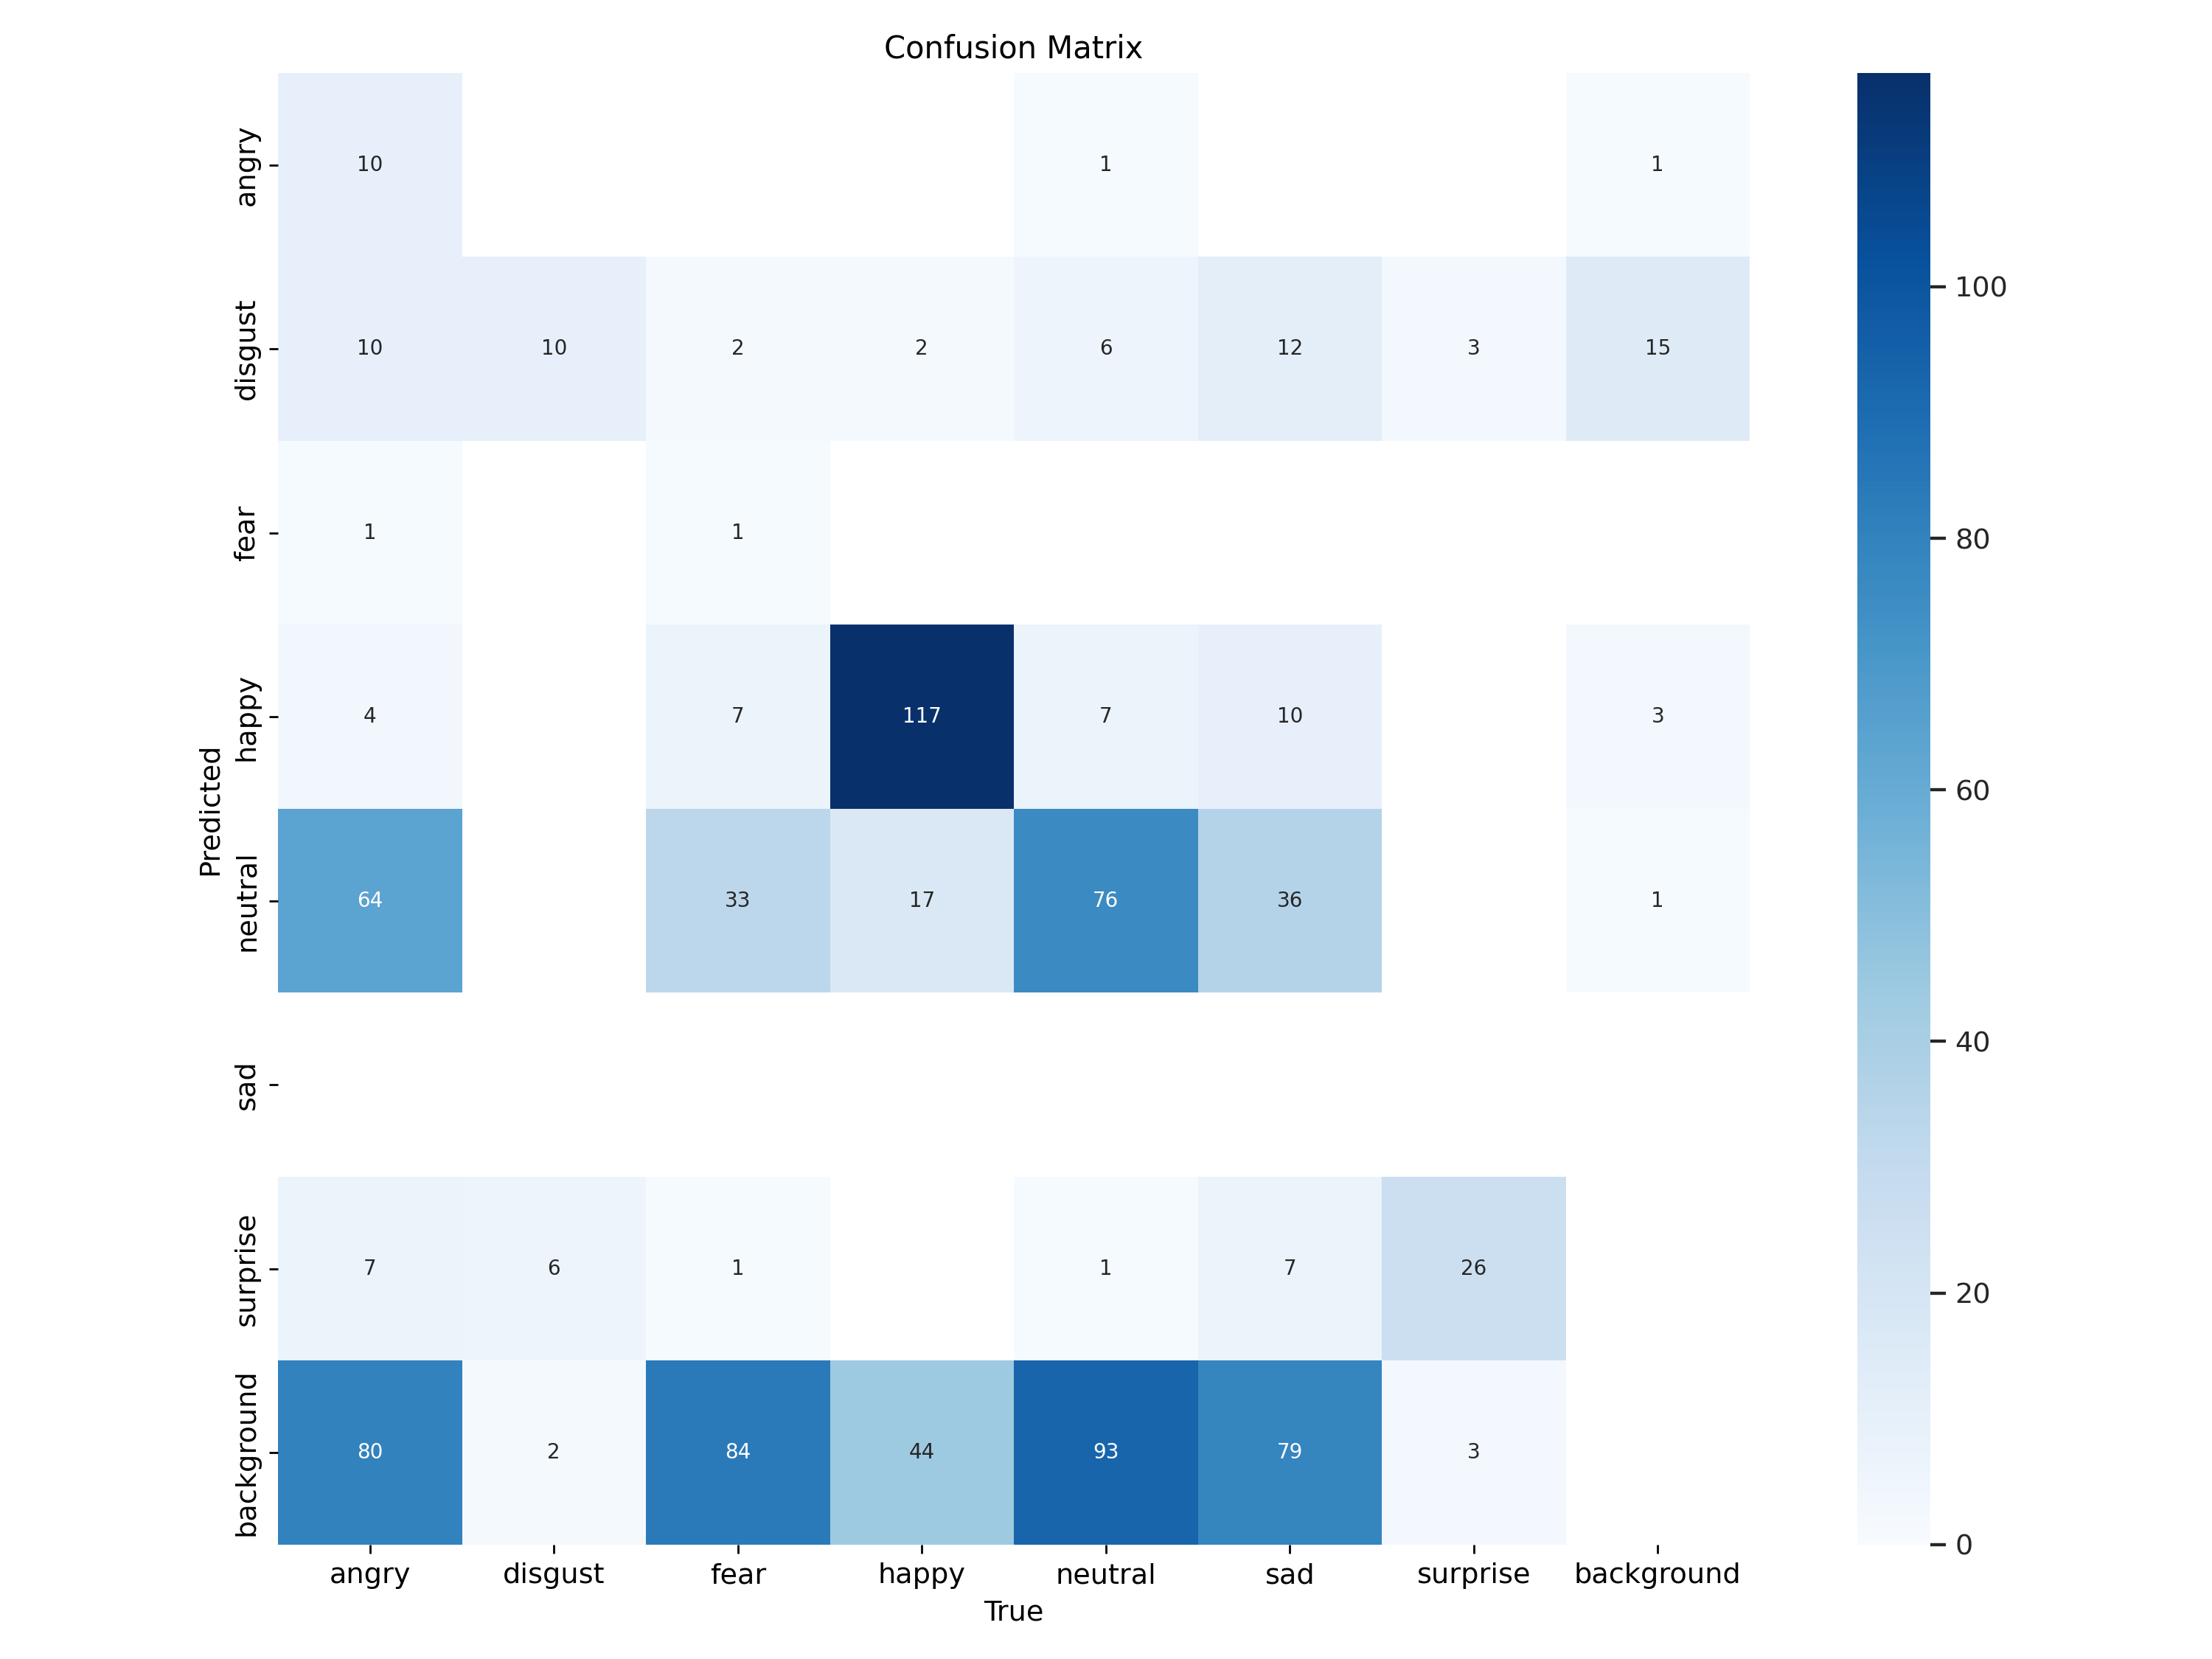

In [18]:
Image("./runs/detect/exp_name/confusion_matrix.png", width=800)

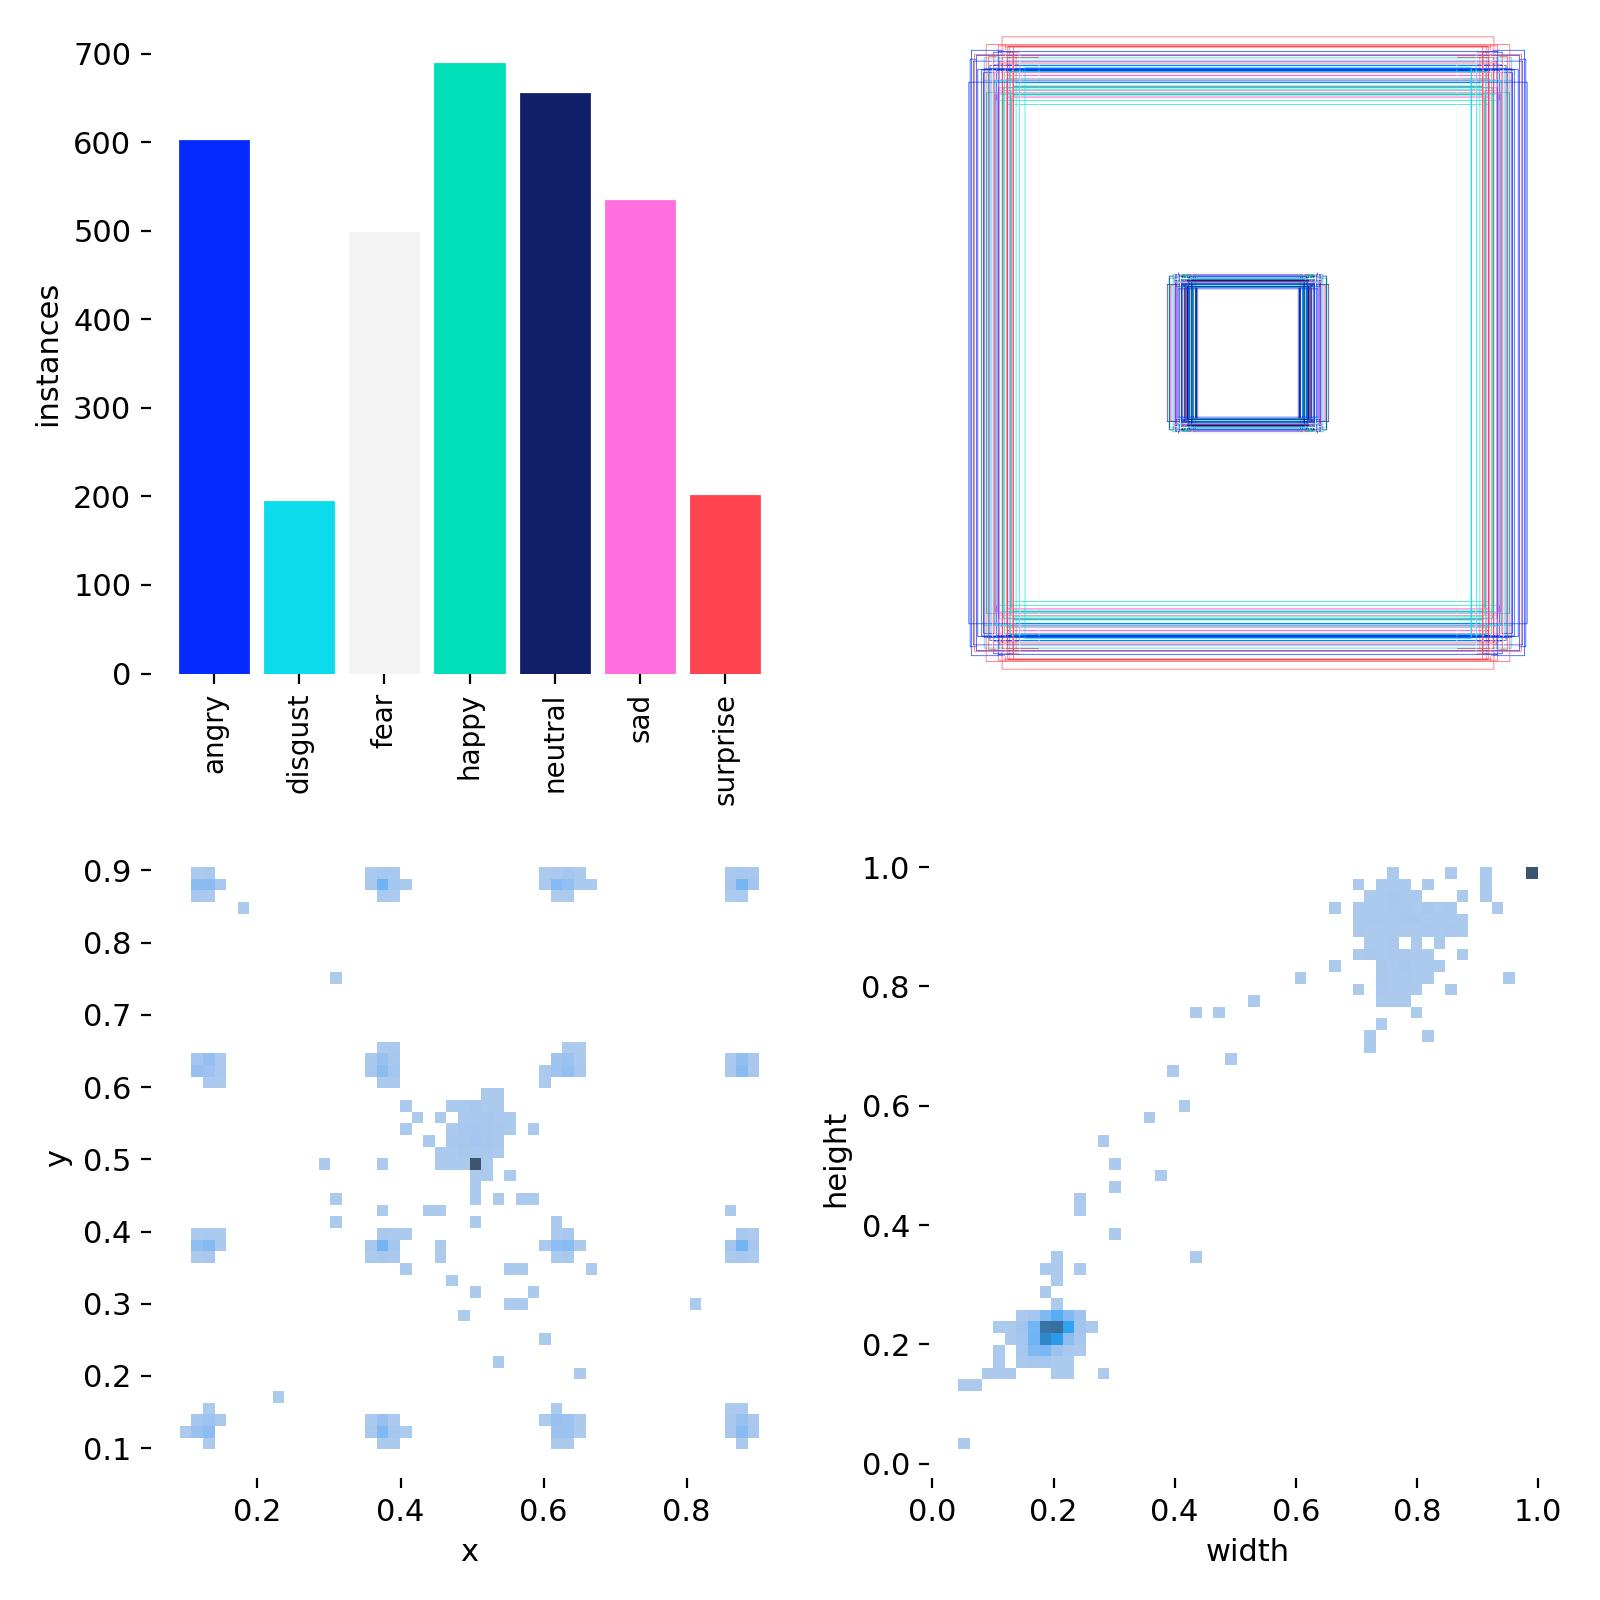

In [20]:
Image("./runs/detect/exp_name/labels.jpg", width=800)

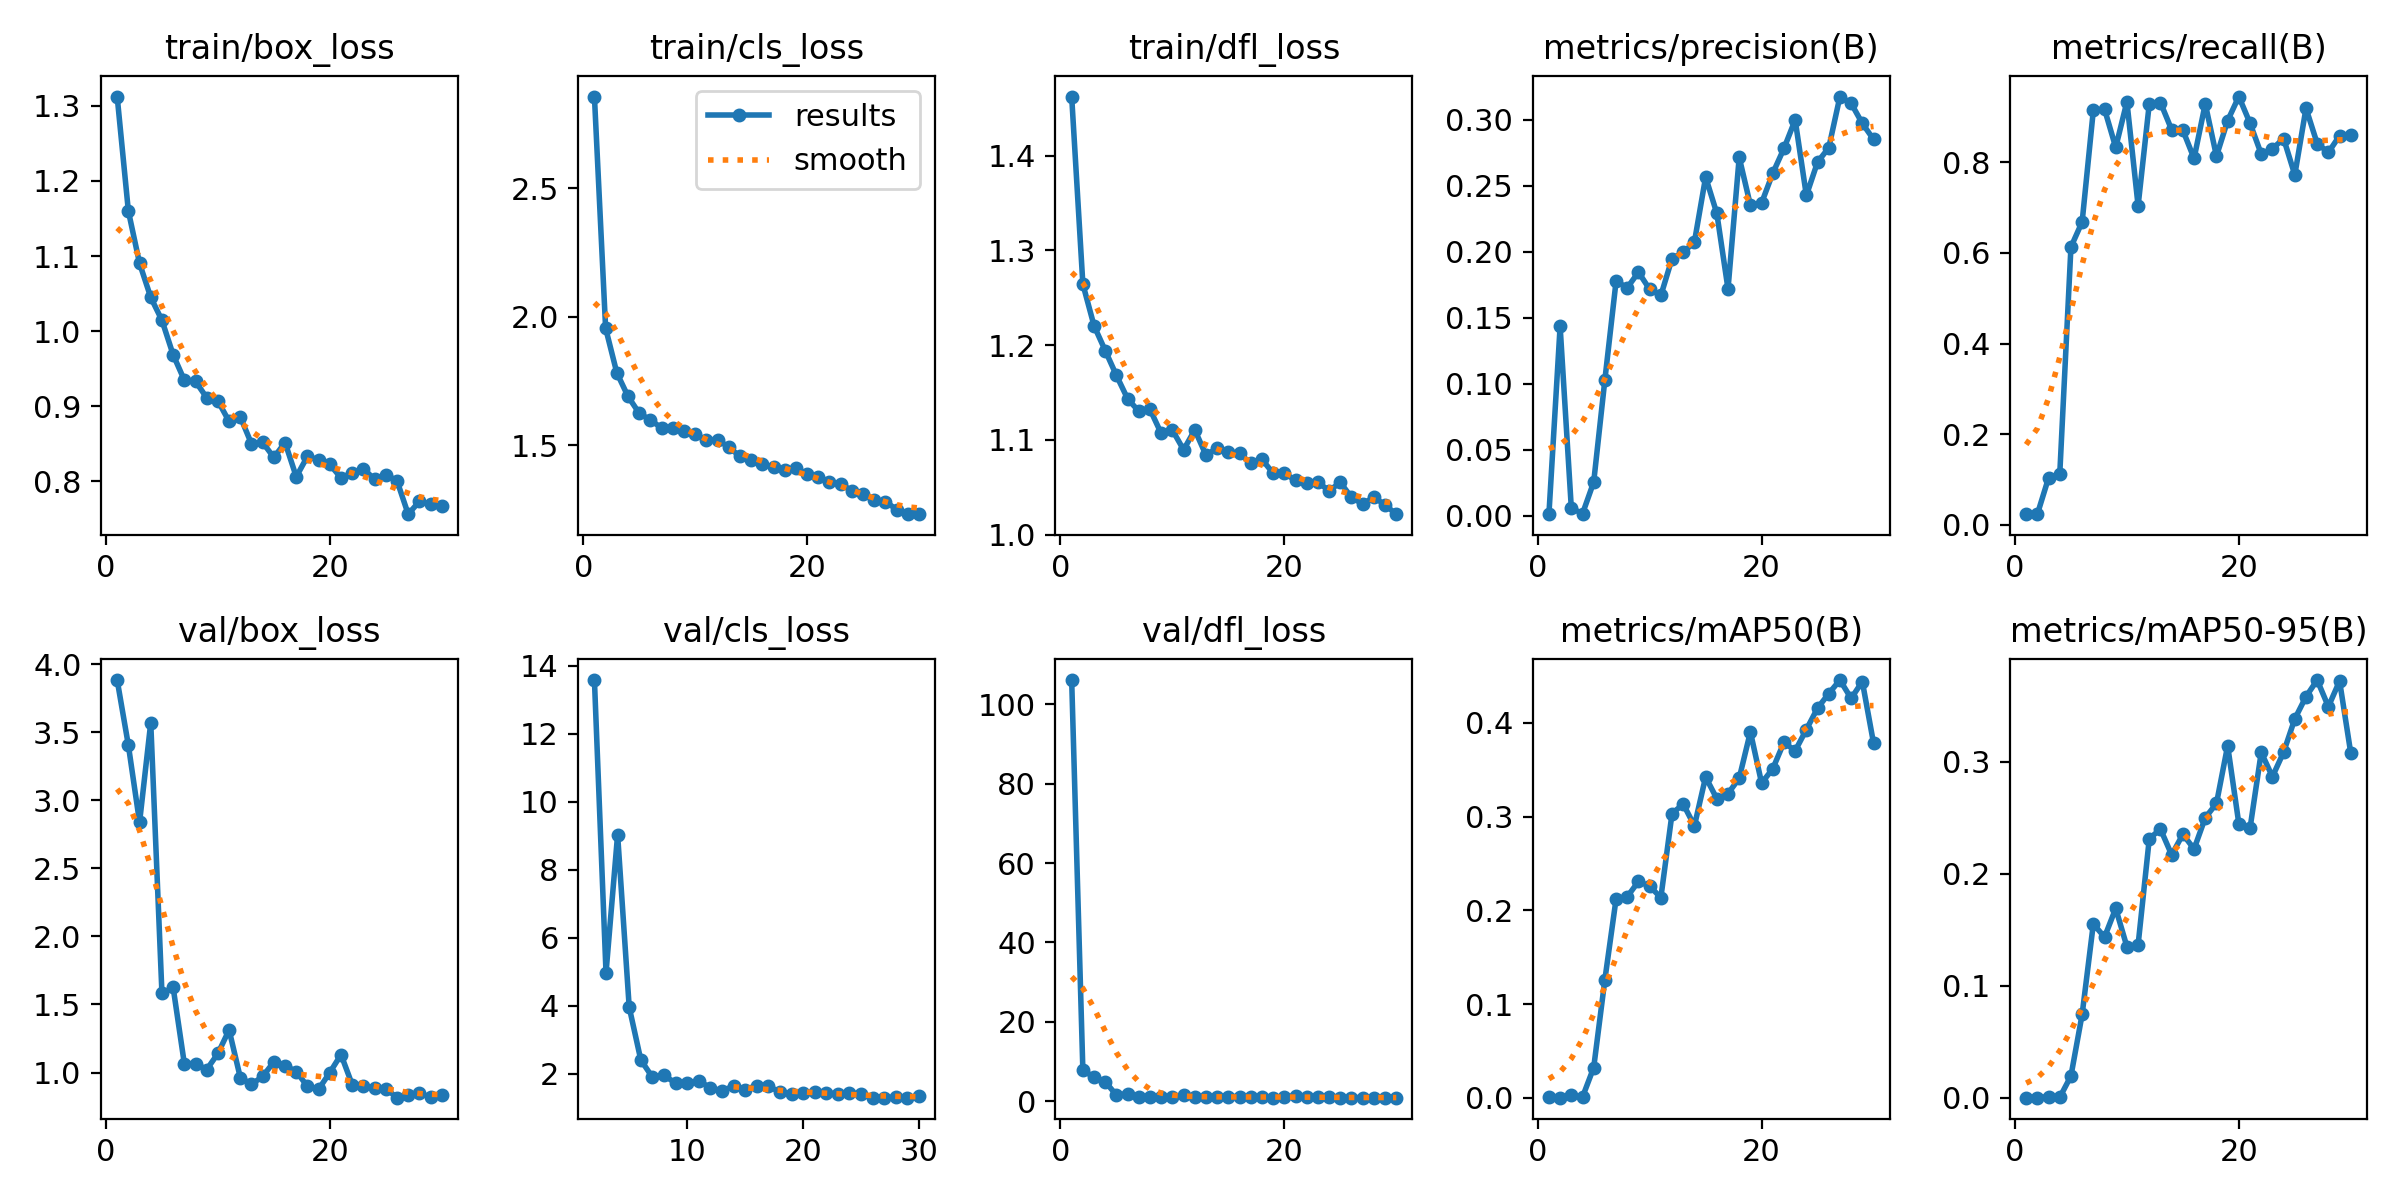

In [21]:
Image("./runs/detect/exp_name/results.png", width=600)

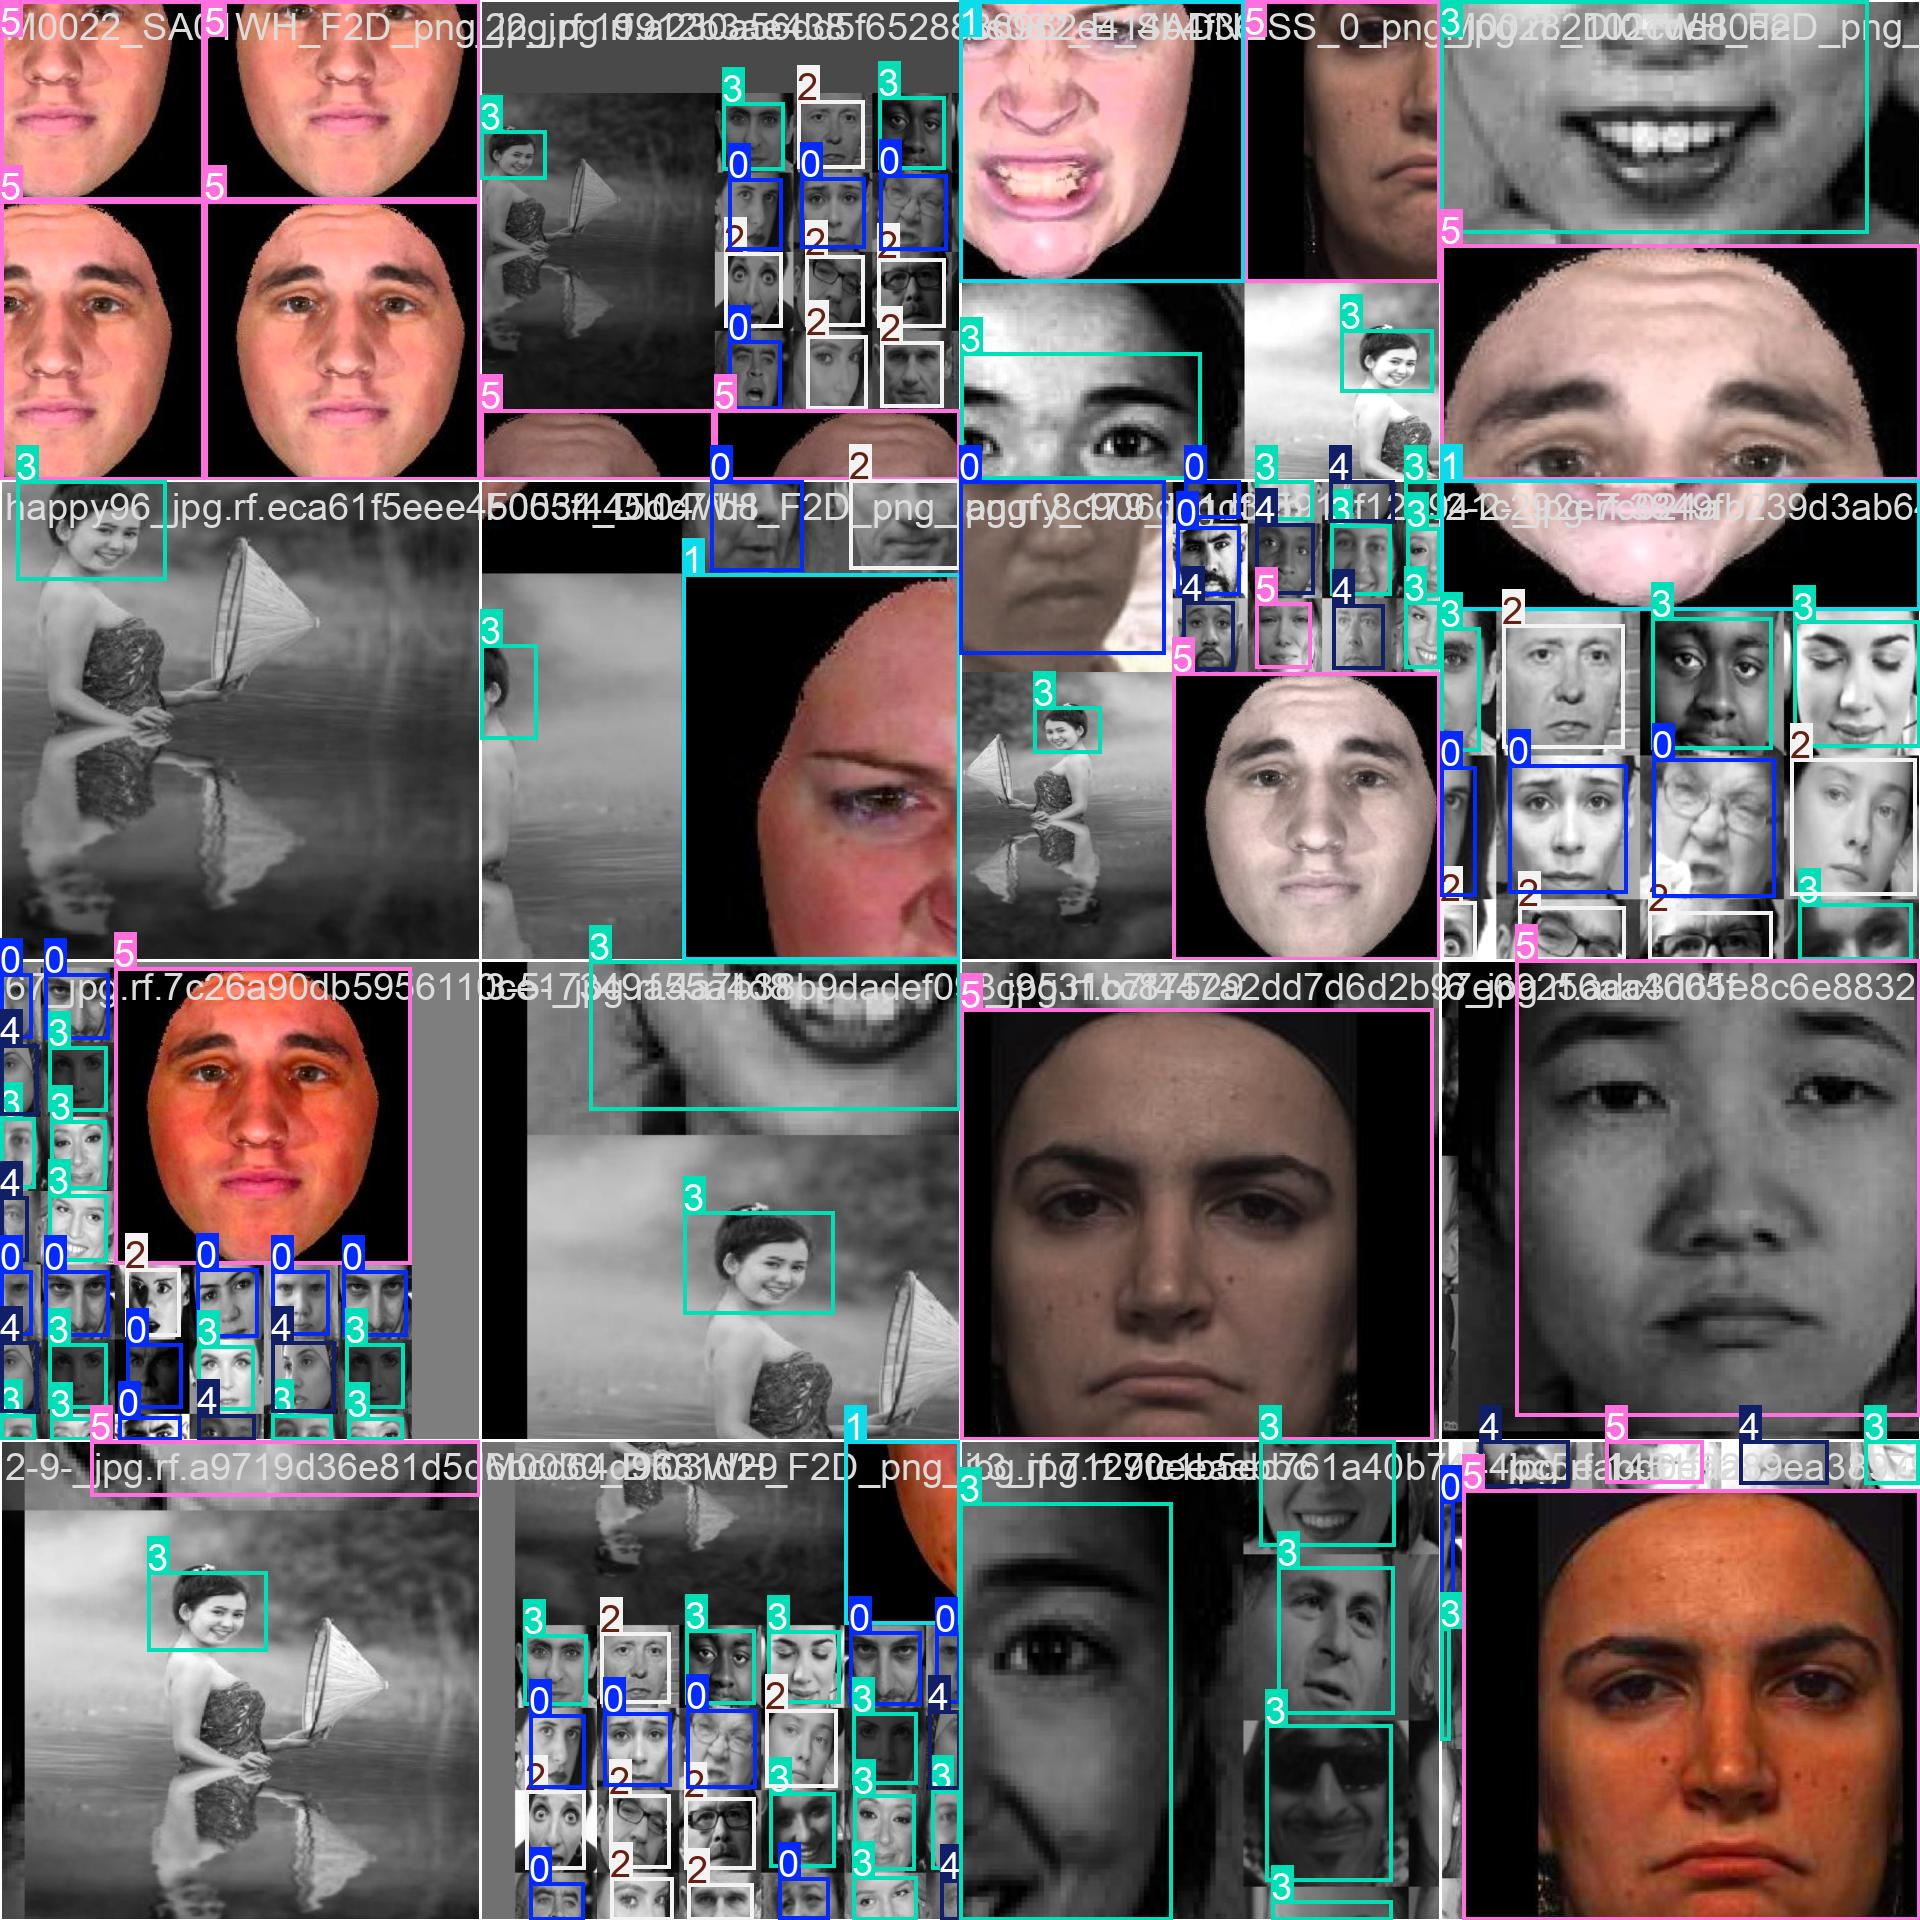

In [22]:
Image("./runs/detect/exp_name/train_batch0.jpg", width=600)

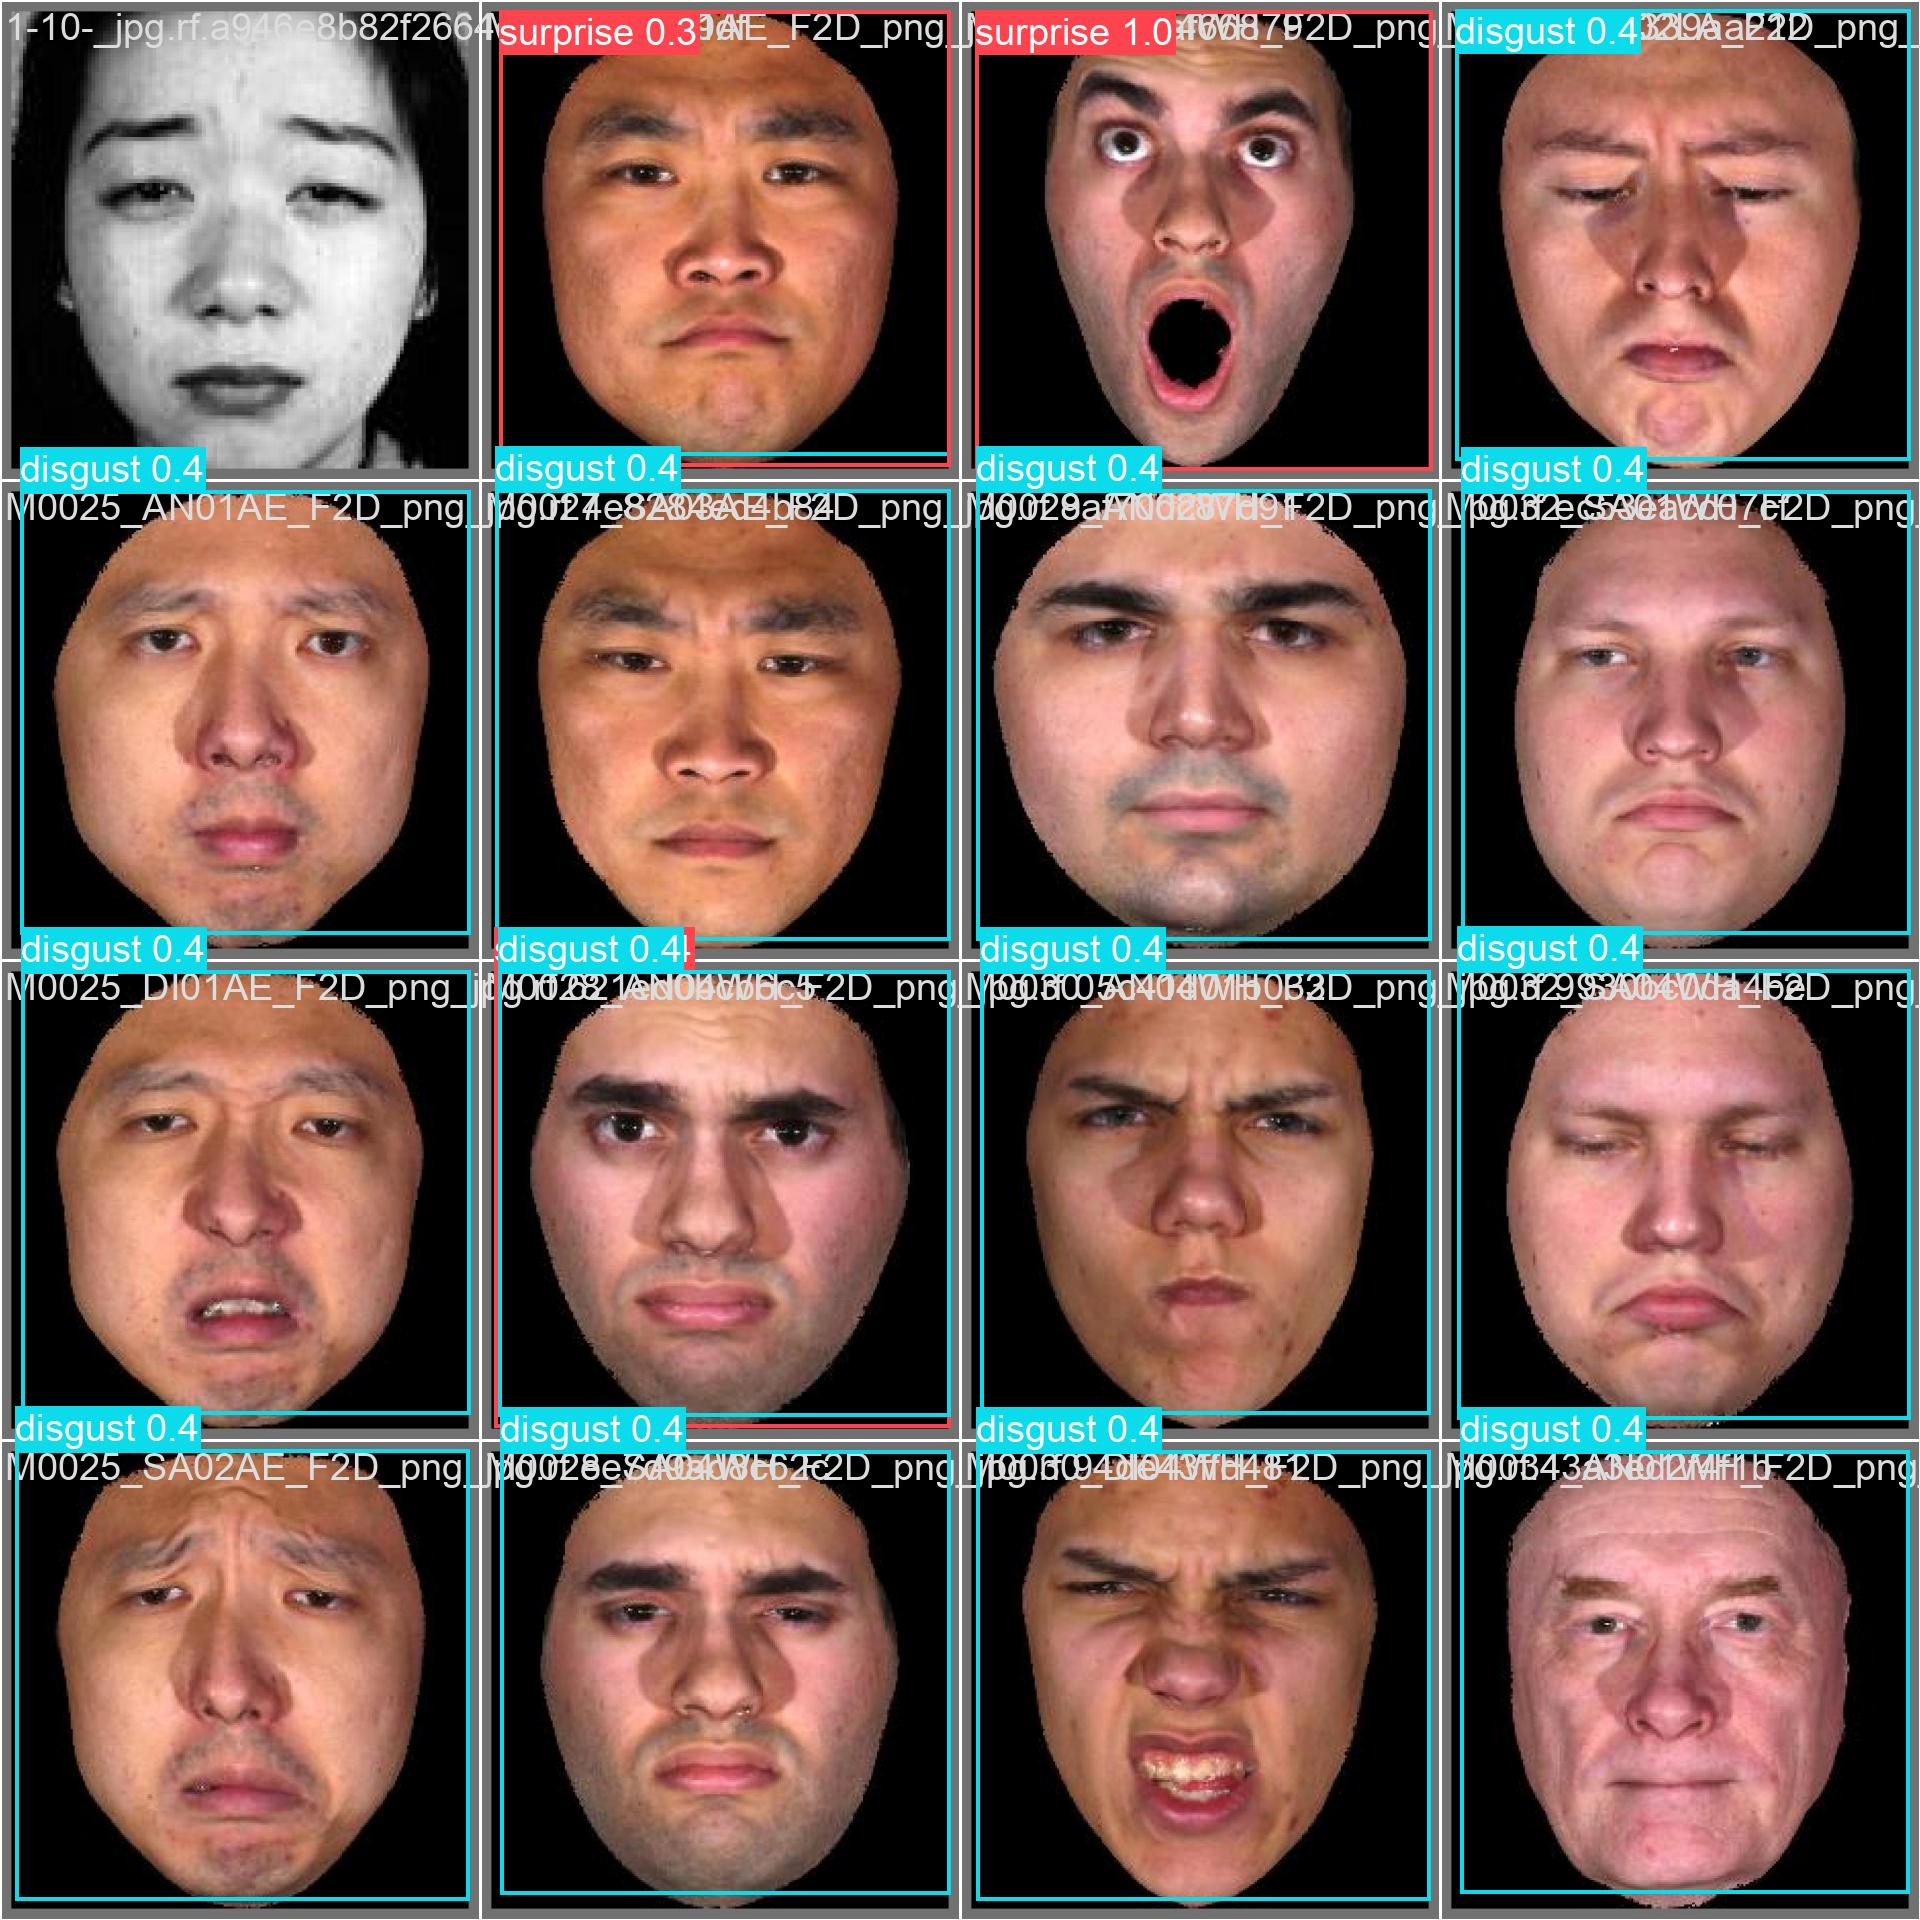

In [26]:
Image("./runs/detect/exp_name/val_batch0_pred.jpg", width=600)

In [ ]:
model.val()

**Step # 05  Validate Fine-Tuned Model**

In [30]:
# Perform validation
results = model.val(
    data=f"{dataset.location}/data.yaml",  # Path to the dataset YAML file
    batch=8,                  # Batch size for validation
    imgsz=640,                 # Image size for validation
    conf=0.001,                # Confidence threshold for predictions
    iou=0.6,                   # IoU threshold for NMS
    device=0,                  # Specify GPU (0) or CPU ('cpu')
    split="val"                # Split to validate on (default: 'val')
)



Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-80GB MIG 7g.80gb, 81051MiB)


val: Scanning /workspace/code/test/yolo11/Facial-Emotion-Dataset--3/valid/labels.cache... 185 images, 0 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:01<00:00, 13.08it/s]


                   all        185        862      0.318      0.855      0.446      0.374
                 angry         76        176      0.258      0.983      0.348      0.257
               disgust         18         18      0.192      0.871      0.367      0.361
                  fear         51        128      0.199      0.898      0.254      0.193
                 happy         64        180      0.677      0.744       0.78      0.579
               neutral         52        184      0.275      0.962      0.366      0.269
                   sad         64        144      0.203       0.59      0.217      0.173
              surprise         32         32       0.42      0.938      0.791      0.784
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/exp_name4


**Step # 06 Inference with Custom Model on Images**

In [33]:
from ultralytics import YOLO
import cv2
import os
from IPython.display import Image, display

# Function to validate on a single image
def validate_on_image(image_path):
    print(f"Validating on image: {image_path}")
    results = model.predict(source=image_path, save=True)
    return results

image_path = "./Facial-Emotion-Dataset--3/test/images/1-5-_jpg.rf.fedd78c04d11645905c4124fa52aaa17.jpg"
validate_on_image(image_path)


Validating on image: ./Facial-Emotion-Dataset--3/test/images/1-5-_jpg.rf.fedd78c04d11645905c4124fa52aaa17.jpg

image 1/1 /workspace/code/test/yolo11/Facial-Emotion-Dataset--3/test/images/1-5-_jpg.rf.fedd78c04d11645905c4124fa52aaa17.jpg: 640x640 (no detections), 8.3ms
Speed: 1.4ms preprocess, 8.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp_name6


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
 obb: None
 orig_img: array([[[ 88,  88,  88],
         [ 92,  92,  92],
         [ 89,  89,  89],
         ...,
         [148, 148, 148],
         [147, 147, 147],
         [149, 149, 149]],
 
        [[ 90,  90,  90],
         [ 94,  94,  94],
         [ 91,  91,  91],
         ...,
         [150, 150, 150],
         [149, 149, 149],
         [151, 151, 151]],
 
        [[ 88,  88,  88],
         [ 92,  92,  92],
         [ 89,  89,  89],
         ...,
         [148, 148, 148],
         [147, 147, 147],
         [149, 149, 149]],
 
        ...,
 
        [[ 62,  62,  62],
         [ 62,  62,  62],
         [ 61,  61,  61],
         ...,
         [136, 136, 136],
         [135, 135, 135],
         [135, 135, 135]],
 
        [[ 62,  62,  62],
         